In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img1=cv2.imread('img1.jpg')
img2=cv2.imread('img2.jpg')
F= [[-1.29750186e-06,  8.07894025e-07,  1.84071967e-03],
    [ 3.54098411e-06,  1.05620725e-06, -8.90168709e-03],
    [-3.29878312e-03,  5.14822628e-03,  1.00000000e+00]]
pts1=[[381, 402],
     [452, 497],
     [671, 538],
     [501, 254],
     [506, 381],
     [474, 440],
     [471, 537],
     [498, 364],
     [706, 319],
     [635, 367]]
pts2=[[390, 346],
     [439, 412],
     [651, 417],
     [477, 194],
     [482, 300],
     [456, 359],
     [454, 444],
     [475, 287],
     [686, 185],
     [606, 253]]
# print(img1.shape)
F=np.asarray(F)
pts1=np.asarray(pts1)
pts2=np.asarray(pts2)
# print(pts1,pts2)

#####-------- PART-A --------#####


def drawLines(img, lines):
    colors=[[205,244,104],[104,144,205],[100,205,244],[0,0,0],[200,150.52],[244,205,205],[52,194,72],[90,200,100],[30,110,140],[150,150,20]]
    colors=np.asarray(colors)
    _, c, _ = img.shape
    for r, color in zip(lines, colors):
#         print(r[2],r[1],r[0])
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1]])
        cv2.line(img, (x0, y0), (x1, y1), color, 2)
    return img



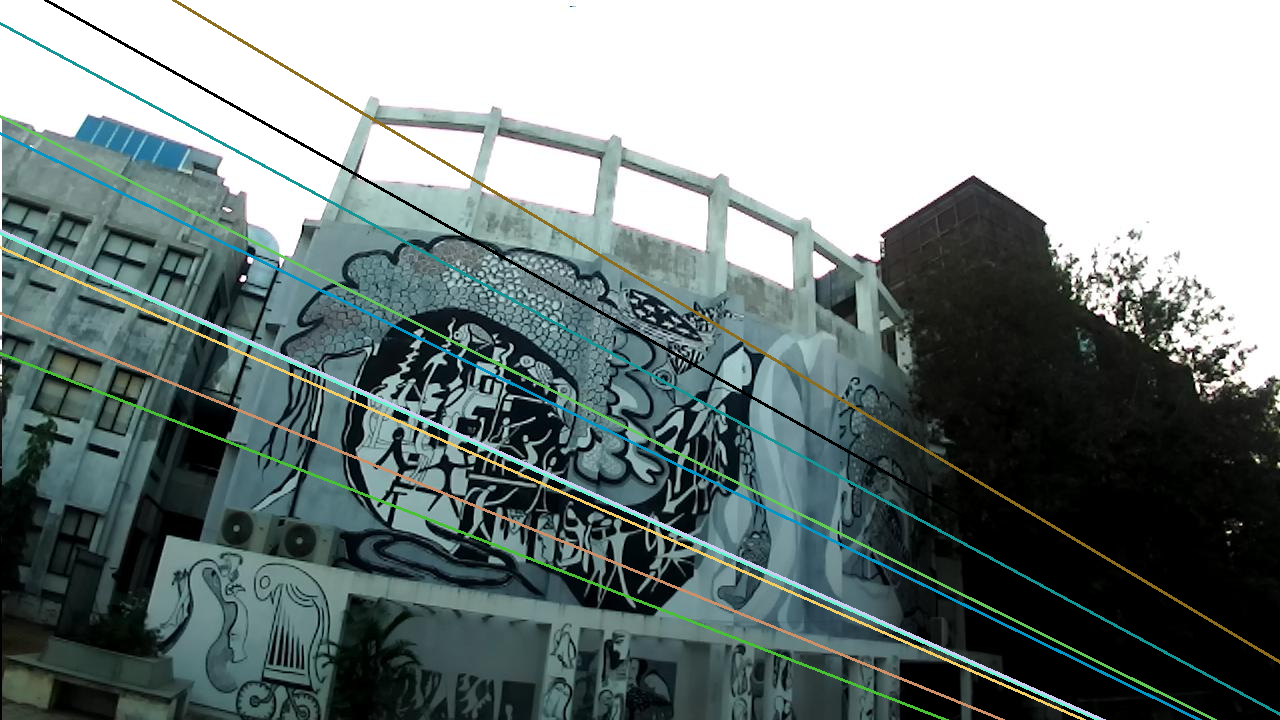

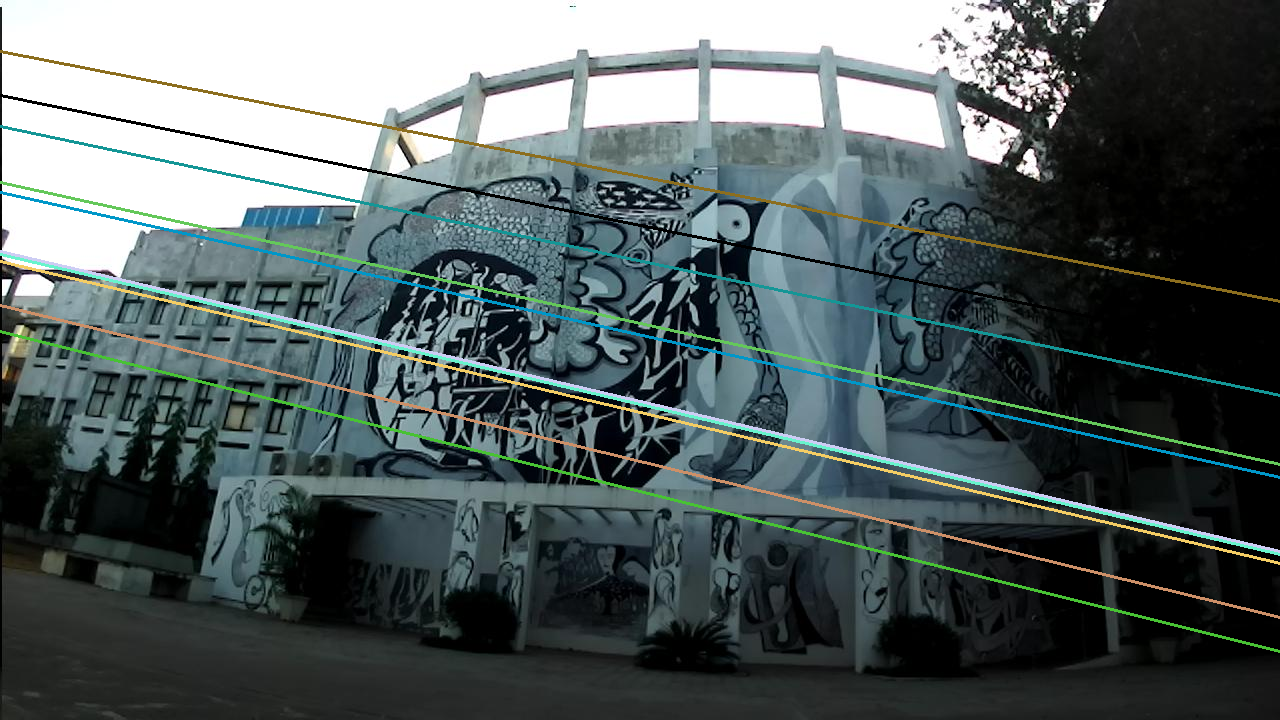

In [2]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image


lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
# print(lines1)
lines1 = lines1.reshape(-1,3)
# print(lines1)
# img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
img5 = drawLines(img1,lines1)
cv2_imshow(img5)


# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
# img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
img3 = drawLines(img2,lines2)
cv2_imshow(img3)
# plt.subplot(121),plt.imshow(img5)
# plt.subplot(122),plt.imshow(img3)
# plt.show()

In [0]:

#####-------- PART-B --------#####
 
u1,d1,vt1=np.linalg.svd(F)
e1=vt1[2,:]/vt1[2,2]
e1=np.reshape(e1,(3,1))
print("EPIPOLE-1:")
print(e1)


EPIPOLE-1:
[[2.15916628e+03]
 [1.18926810e+03]
 [1.00000000e+00]]


In [0]:
u2,d2,vt2=np.linalg.svd(np.transpose(F))
e2=vt2[2,:]/vt2[2,2]
e2=np.reshape(e2,(3,1))
print("EPIPOLE-2:")
print(e2)


EPIPOLE-2:
[[-5.13190964e+03]
 [-9.48854631e+02]
 [ 1.00000000e+00]]
